In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from fasta import Fasta
import itertools

In [2]:
train = Fasta("../../data/sasa/Train_HHblits_sasa.fasta")
test = Fasta("../../data/sasa/CASP12_HHblits_sasa.fasta")
b_test = Fasta("../../data/sasa/new_test_final_pisces_sasa.fasta")

In [3]:
fuckers = []
for item in b_test.sequences.items():
    i = item[1]
    if len(list(i[0])) != len(i[1]):
        fuckers.append(item[0])

In [4]:
fuckers

[]

In [5]:
def mean_sasa(fasta: Fasta):
    seq_label_test = fasta.sequences.values()
    aa_seq = ""
    scores = []
    for i in seq_label_test:
        aa_seq += i[0]
        scores += i[1]
    scores_arr = np.array([list(aa_seq), [float(i) for i in scores]]).T
    scores_arr = scores_arr.reshape(-1, 2)
    from collections import defaultdict
    d = defaultdict(list)
    for key, val in scores_arr:
        if float(val) == 0.0:
            continue
        d[key].append(float(val))
    for items in d.items():
        d[items[0]] = np.mean(items[1])
    msasa_df = pd.DataFrame(d.items(), columns=["AA", "mSASA"])
    return msasa_df

In [6]:
train_msasa = mean_sasa(train)
test_msasa = mean_sasa(test)
btest_msasa = mean_sasa(b_test)

In [7]:
train_msasa["set"] = "train"
test_msasa["set"] = "CASP12 test"
btest_msasa["set"] = "blind test"

msasa_df = pd.concat([train_msasa, test_msasa, btest_msasa])

In [8]:
msasa_df

,AA,mSASA,set
0,A,0.277687,train
1,Y,0.489011,train
2,I,0.264644,train
3,K,1.002775,train
4,Q,0.767281,train
...,...,...,...
16,P,0.568044,blind test
17,R,0.974025,blind test
18,M,0.413935,blind test
19,C,0.203552,blind test


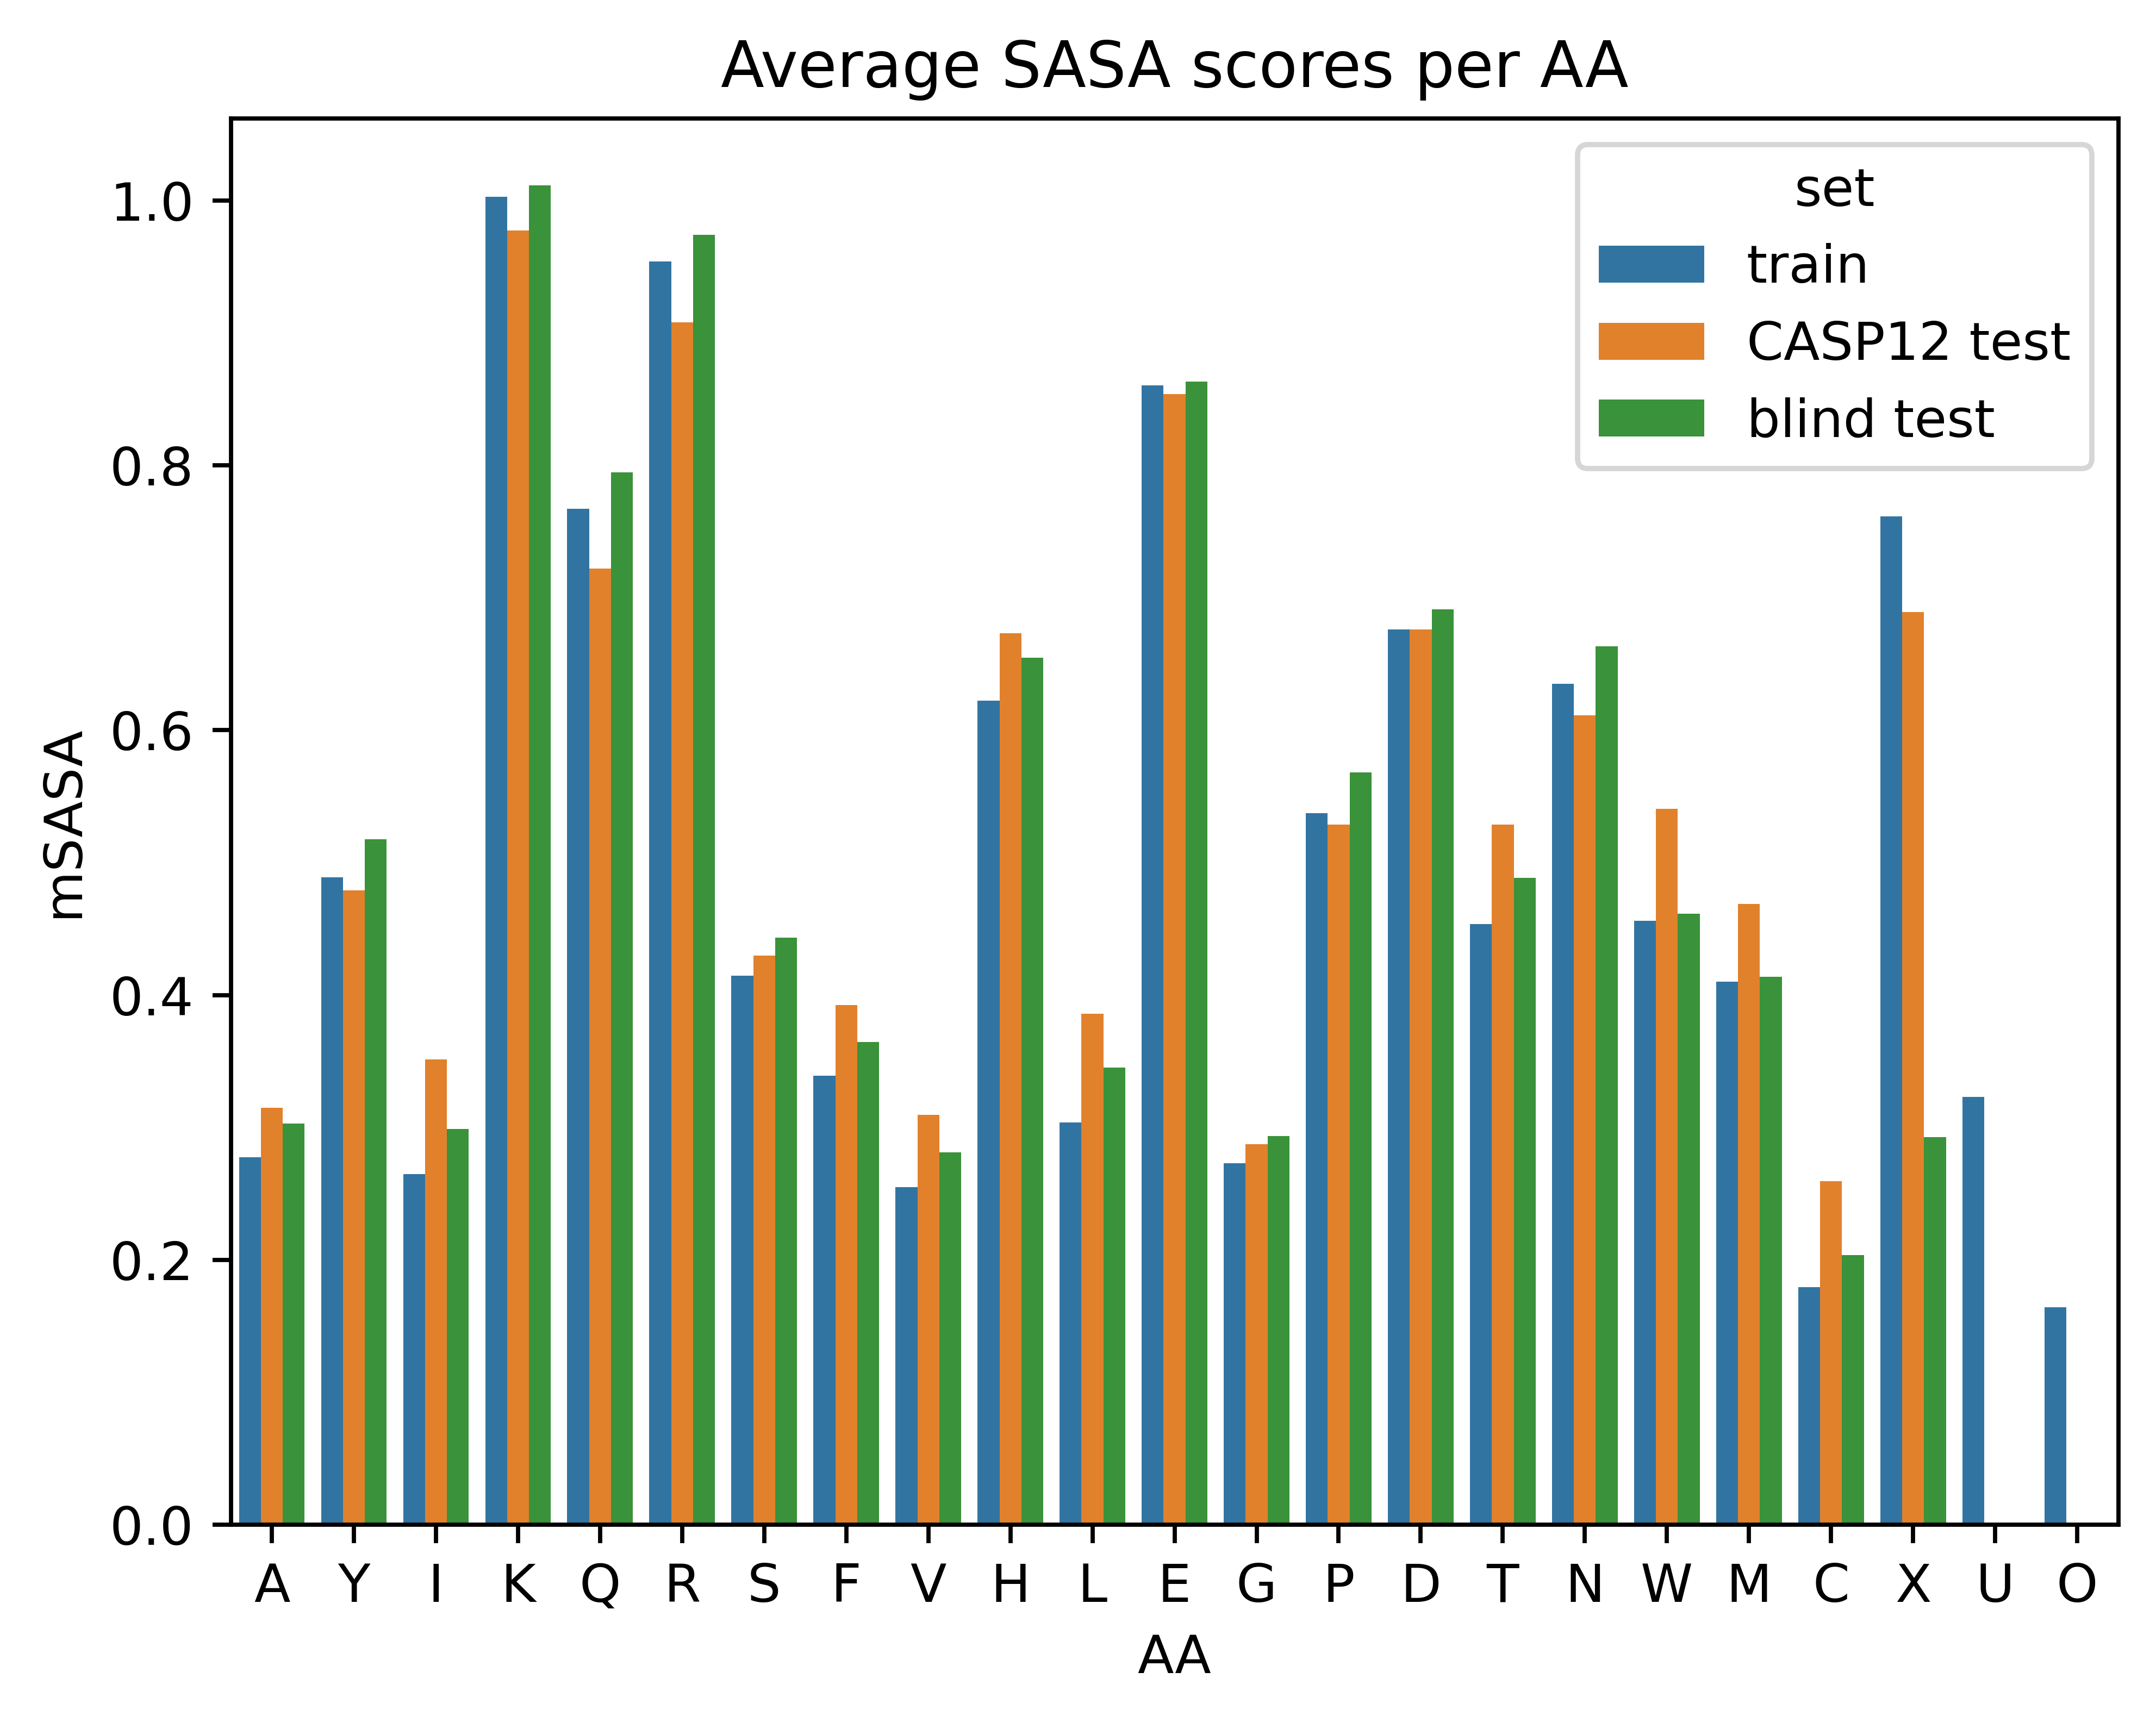

In [67]:
import matplotlib


ax = sns.barplot(data=msasa_df, x="AA", y="mSASA", hue="set")
ax.set(title="Average SASA scores per AA")
sns.move_legend(ax, "upper right")
plt.savefig("msasa.png", dpi=600)

In [41]:
def get_all_score(fasta):
    seq_label_test = fasta.sequences.values()
    scores = []
    for i in seq_label_test:    
        scores += i[1]
    return [i*100 for i in scores if float(i) != 0.0]

In [42]:
scores = [float(x) for x in get_all_score(train)]

In [43]:
np.any(np.array(scores) == 0)

False

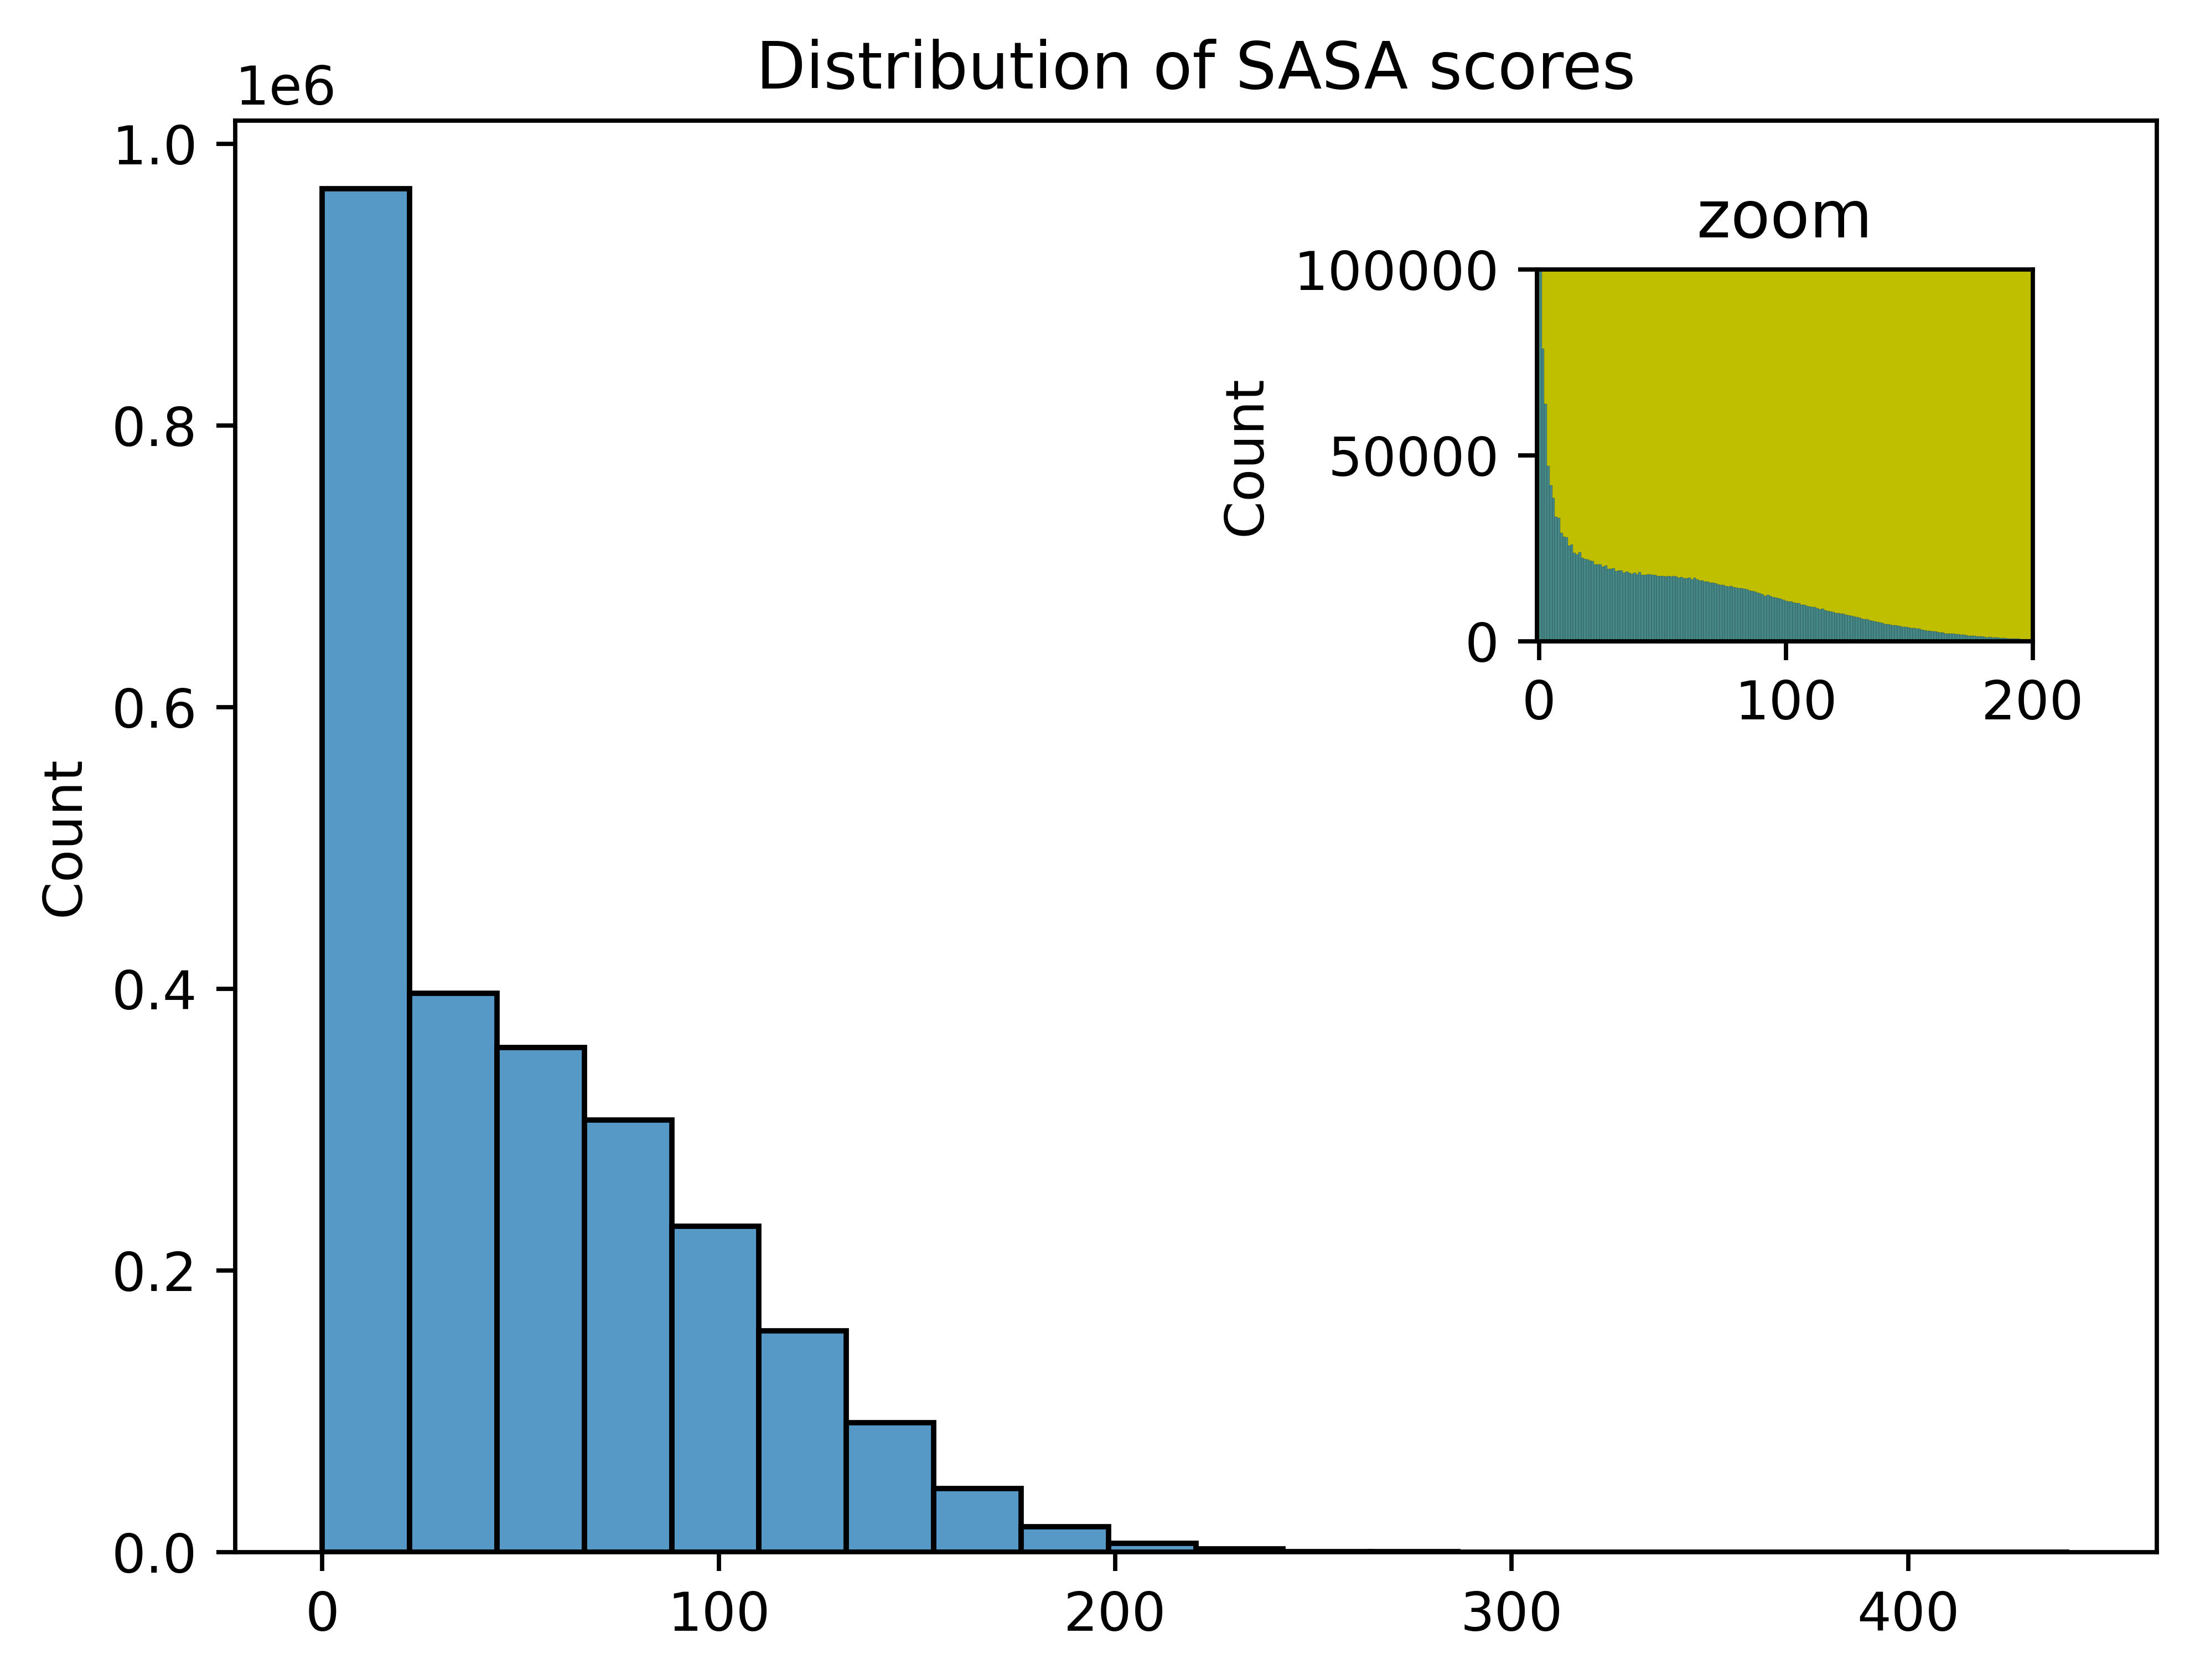

In [68]:
fig, ax = plt.subplots()
sns.histplot(scores, ax=ax, bins=20)
ax.set(title="Distribution of SASA scores")
ax2 = plt.axes([0.65, 0.6, .2, .2], facecolor='y')
sns.histplot(scores, ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([-1,200])
ax2.set_ylim([0,100000])
plt.savefig("sasa_dist.png", dpi=600)

In [14]:
"""Negative sites: 11212
N-sites: 11637
O-sites: 2715"""
glyco_df = pd.DataFrame(data=[[11212, "Negative"], [11637, "N-site"],[2715, "O-site"]], columns=["Number of Sites", "Site"])
glyco_df["set"] = "train"
glyco_df_test = pd.DataFrame(data=[[1154, "Negative"], [580, "N-site"],[2297, "O-site"]], columns=["Number of Sites", "Site"])
glyco_df_test["set"] = "test"
m_glyco_df = pd.concat([glyco_df, glyco_df_test])

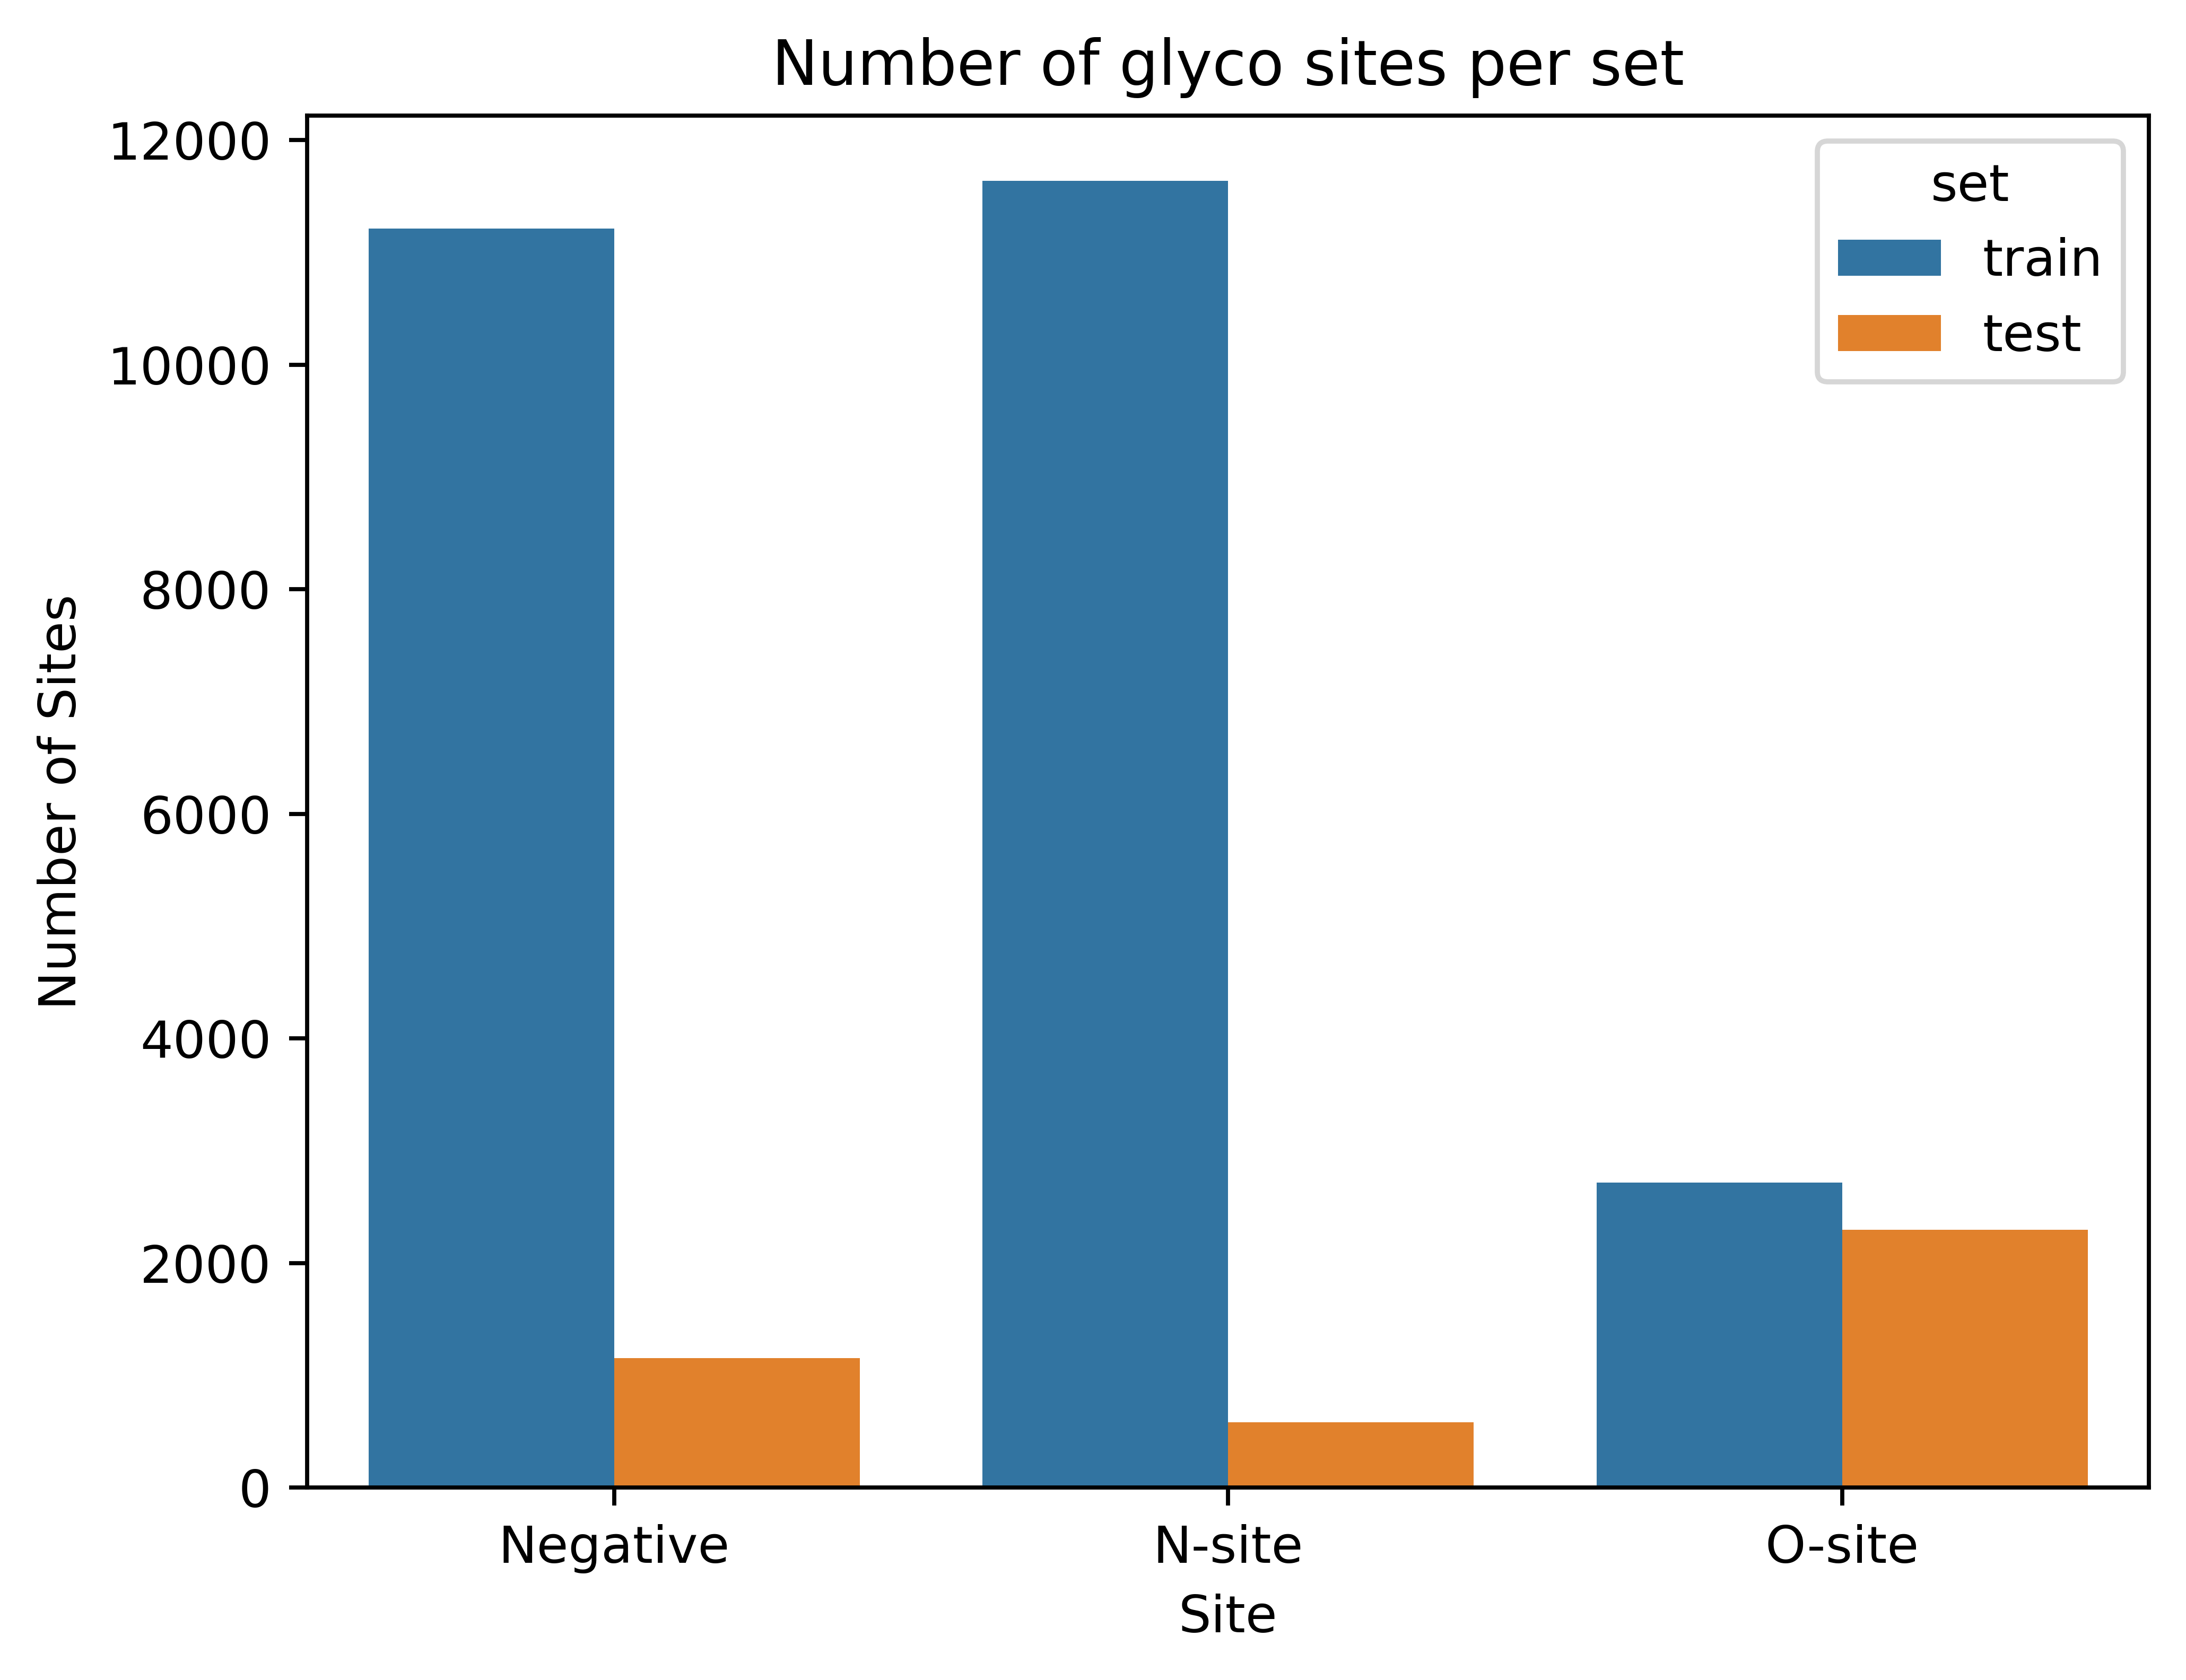

In [69]:
ax = sns.barplot(data=m_glyco_df, x="Site", y="Number of Sites", hue="set")
ax.set(title="Number of glyco sites per set")
sns.move_legend(ax, "upper right")
plt.savefig("glyco_site.png", dpi=600)